# Martin Iniguez de Onzono Muruaga. AAND Numerical Sheet 03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import scipy.io 

## Ex.1 Coefficient of variation and Fano factor.

In [2]:
spikes = np.loadtxt('SpikeTimes.dat').T/1000 # s
t_stim = 5.5 # s
t_res = 0.0001 # s

In [3]:
def plot_spikes(spikes,t_stim,ylim=[0,spikes.shape[0]]):
    plt.eventplot(spikes)
    plt.xlim([0,t_stim]);
    plt.ylim(ylim)
    plt.title('Raw spike data')
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index')  

### a) Make a raster plot of the data.

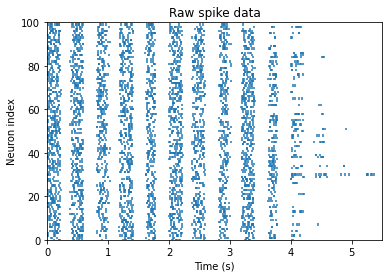

In [4]:
plot_spikes(spikes,t_stim)

### b) Plot a histogram of the ISIs pooled across trials.

In [5]:
def get_ISI(spikes,hist=False,alpha=1,label=None,hist_not_norm=False):
    ISIs=np.abs(np.diff(spikes)).flatten()
    ISIs = ISIs[~np.isnan(ISIs)]
    if hist:
        counts, bins = np.histogram(ISIs,bins=50)
#         plt.hist(bins[:-1], bins, weights=counts/np.sum(counts),alpha=alpha,label=label);
        plt.hist(bins[:-1], bins, weights=counts/np.sum(counts),alpha=alpha,label=label);
        plt.xlabel('ISI (s)')
    if hist_not_norm:
        plt.hist(ISIs,bins=50,label=label)
    return ISIs

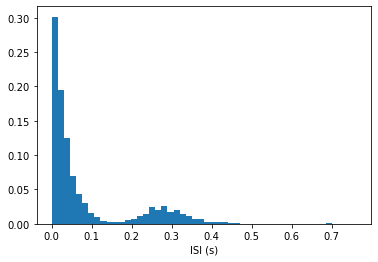

In [6]:
ISI = get_ISI(spikes,hist=True)

### c) Compute the CV.

In [7]:
def cv(ISI):
    stdv = np.std(ISI)
    mean_I = np.mean(ISI)
    cv_I = np.round(stdv/mean_I,2)
    return cv_I

In [8]:
print(f'The coefficient of variation is {cv(ISI)}')

The coefficient of variation is 1.35


### d) Compute the trial-resolved and time-resolvd Fano factor.

In [9]:
def trial_F(spikes):
    ISIs=np.abs(np.diff(spikes))
    var = np.nanstd(ISIs,axis=1)**2
    num_counts = np.empty(ISIs.shape[0])
    
    for i in range(0,ISIs.shape[0]):
        num_counts[i] = np.sum(~np.isnan(ISIs[i]))
    
    Fano = var/num_counts
    return Fano

def spike_train(spikes,t_stim,t_res):
    spike_train=np.zeros(np.int(t_stim/t_res))
    spikes1 = spikes[~np.isnan(spikes)]
    numbers = np.ndarray.flatten((spikes1/t_res).astype(np.int64))
    spike_train[numbers] = 1   
    
    return spike_train

def time_F(spikes,t_stim,t_res,win_len,):
    spk_tr = spike_train(spikes,t_stim,t_res)
    wins = np.round(np.int(t_stim/win_len))
    inc = np.round(np.int(win_len/t_res))
    
    times = np.linspace(0,t_stim/t_res,wins)*t_res
    time_F = np.empty(wins)
    
    for i in range(0,wins):
        w=spk_tr[i*inc:i*inc+inc]
        idx=np.diff(np.argwhere(w).T)*t_res
        time_F[i] = np.std(idx)**2/idx.shape[0]
        
    return time_F,times

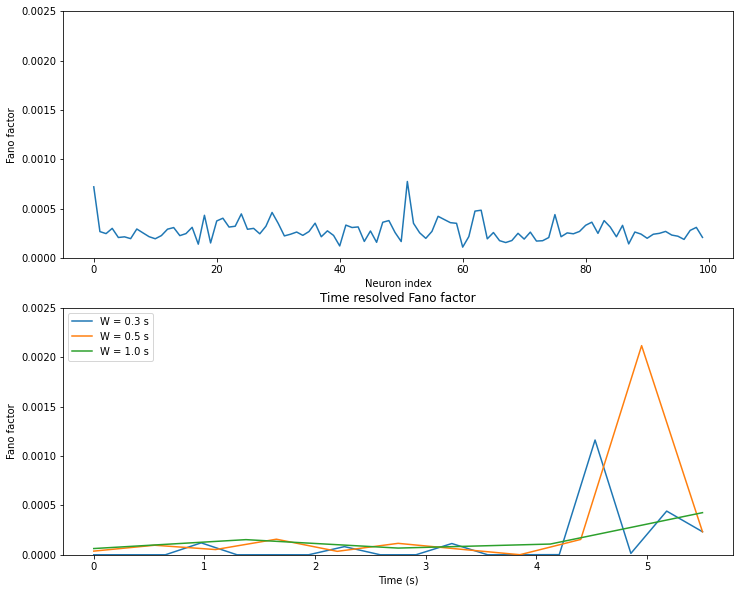

In [10]:
win_len = np.array([0.3,0.5,1]) # s

fig = plt.figure(figsize=(12,10))

# Trial-resolved
fig.add_subplot(2,1,1)
plt.plot(trial_F(spikes))
plt.xlabel('Neuron index')
plt.ylabel('Fano factor')
plt.ylim(0,0.0025)

# Time-resolved
fig.add_subplot(2,1,2)

plt.title('Time resolved Fano factor')
for i,w in enumerate(win_len):
    Fano_time, times = time_F(spikes,t_stim,t_res,w)
    plt.plot(times,Fano_time,label=f'W = {w} s')
    plt.xlabel('Time (s)')
    plt.ylabel('Fano factor')
    plt.ylim(0,0.0025)
    plt.legend()

#### How does the window size affect the Fano factor in this dataset?

Bigger window size makes a more stable, lower Fano factor across time. It can be seen that for window = 0.5 s , it meets exactly a region of higher variability (end of the trial), and there the Fano factor is pretty big compared to the average.

## Ex.2 Homogeneous and inhomogeneous Poisson process.

In [11]:
data = scipy.io.loadmat('PoissonSpikeTrains.mat')
hom = data['SpikeTimes_hom']/1000
inh =  data['SpikeTimes_inh']/1000
t_stim2 = 10 
t_stim3 = 21

### a) Construct and plot the ISIs histograms.

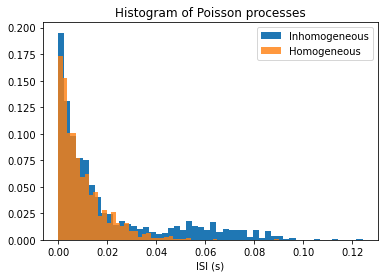

In [12]:
ISI_inh = get_ISI(inh,hist=True,alpha=1,label='Inhomogeneous')
ISI_hom = get_ISI(hom,hist=True,alpha=0.8,label='Homogeneous')
plt.legend();
plt.title('Histogram of Poisson processes');

#### How are they different?

It can be seen that the Homogeneous Poisson process yields a much more narrow distribution in its ISI histogram, with much smaller ISI than the inhomogeneous one. However, the inhomogeneous one shows a very big peak i the first bin compared to the first one of the homogeneous one.

### b) Compute the CV and the Fano factor. 

1.18 1.01


C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

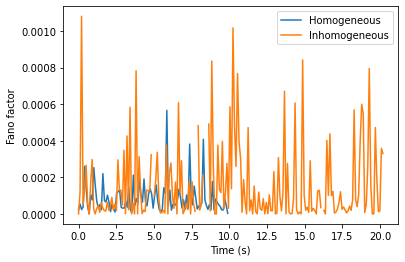

In [13]:
Fano_hom, times = time_F(hom,t_stim2,t_res,0.1)
plt.plot(times,Fano_hom,label= 'Homogeneous')
Fano_inh, times = time_F(inh,21,t_res,0.1)
plt.plot(times,Fano_inh,label= 'Inhomogeneous')         
plt.xlabel('Time (s)');
plt.ylabel('Fano factor');
plt.legend()

cv_i = cv(get_ISI(inh))
cv_h = cv(get_ISI(hom))
print(cv_i,cv_h)

The CV of the homogeneous case is almost 1 (ideal for Poisson), while in the homogeneous case, it is bigger and so is its General Fano factor, as can be seen in the plot.

### c) Compute and plot the spike-train auto-correlation histogram.

In [14]:
bin_s = 0.1e-3

def firing_rate(spikes,t_stim,t_res):
    spk = spike_train(spikes,t_stim,t_res)
    mean_fire = np.sum(spk)/t_stim
    return mean_fire

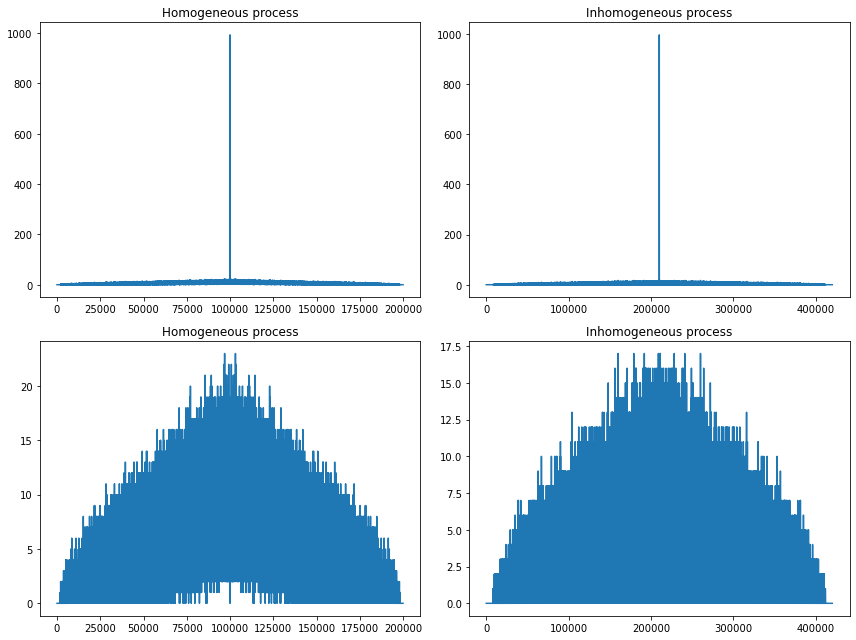

In [15]:
sp_hom = spike_train(hom,t_stim2,t_res)
corr_hom = np.correlate(sp_hom,sp_hom,mode='full')

sp_inh = spike_train(inh,t_stim3,t_res)
corr_inh = np.correlate(sp_inh,sp_inh,mode='full')

fig = plt.figure(figsize=(12,9))

fig.add_subplot(2,2,1)
plt.plot(corr_hom);
plt.title('Homogeneous process')

fig.add_subplot(2,2,2)
plt.plot(corr_inh);
plt.title('Inhomogeneous process')

fig.add_subplot(2,2,3)
corr_hom[int(len(corr_hom)/2)]=0
plt.plot(corr_hom)
plt.title('Homogeneous process')

fig.add_subplot(2,2,4)
corr_inh[int(len(corr_inh)/2)]=0
plt.plot(corr_inh)
plt.title('Inhomogeneous process')
plt.tight_layout()

### d) Why do the CV and the Fano factor deviate from the theoretical value of 1?

Due to the stochasticity of the generated data, the discretized nature of the signal and that is a signal in a limited time (and not infinite), CV and Fano factor deviates from its ideal.

## Ex.3 Poisson Process with refractory period.

In [16]:
sp_ref = data['SpikeTimes_ref']/1000
rt_ref = np.array(data['rates_ref']).flatten()
t_ref = 5e-3 #s

### a) Estimate the effective firing rate.

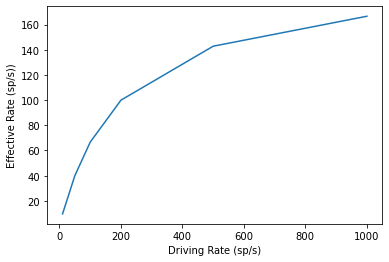

In [17]:
t_stim4 = np.round(sp_ref[-1,:])
fire_rate = np.empty(t_stim4.shape[0])

for i, sp in enumerate(sp_ref.T):
    fire_rate[i] = firing_rate(sp,t_stim4[i],t_res)
    
plt.plot(rt_ref,fire_rate)
plt.xlabel('Driving Rate (sp/s)')
plt.ylabel('Effective Rate (sp/s))');

#### Which level does reff approach for large rdrive?

It approaches the rate = 1/t_ref (200 spikes/second), which creates an upper-bound for the rate of the neuron (it cannot fire faster than that since it has to wait for the refractory period to pass before firing again).

### b) Construct and plot the ISI histograms for each driving rate.

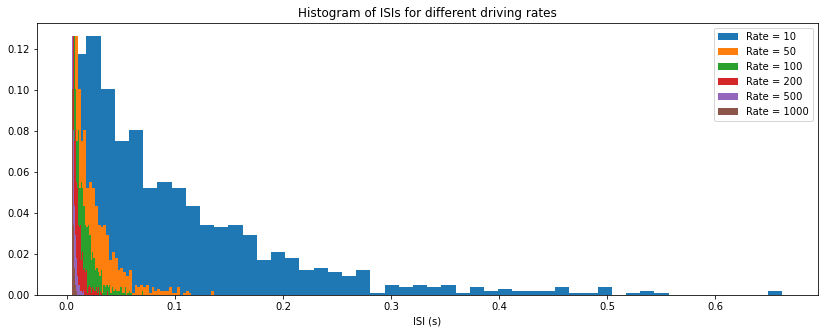

In [18]:
fig = plt.figure(figsize=(14,5))

for i, sp in enumerate(sp_ref.T):
    ISI = get_ISI(sp,hist=True,alpha=1,label=f'Rate = {rt_ref[i]}')

plt.legend();
plt.title('Histogram of ISIs for different driving rates');

### c) Compute the CV and the Fano factor for each driving rate and plot them against rdrive.

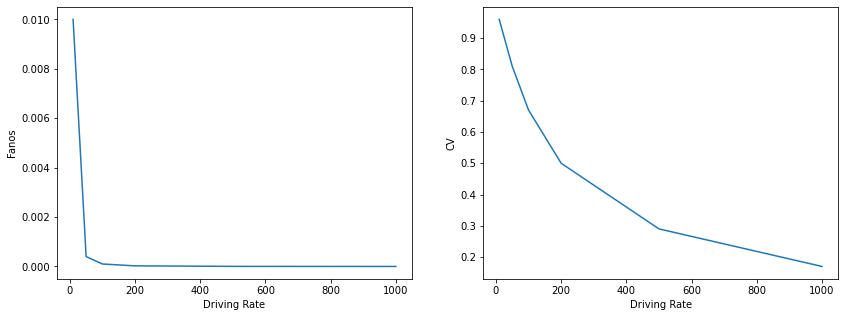

In [19]:
fig = plt.figure(figsize=(14,5))
Fanos =  np.empty(t_stim4.shape[0])
CVs = np.empty(t_stim4.shape[0])

for i, sp in enumerate(sp_ref.T):
    Fanos[i], times = time_F(sp,t_stim4[i],t_res,t_stim4[i]-t_res)
    CVs[i] = cv(get_ISI(sp))

fig.add_subplot(1,2,1)  

plt.plot(rt_ref,Fanos)
plt.xlabel('Driving Rate')
plt.ylabel('Fanos');

fig.add_subplot(1,2,2)

plt.plot(rt_ref,CVs)
plt.xlabel('Driving Rate')
plt.ylabel('CV');

#### Why do they decrease with increasing rates?

As the Fano factor and the CV are inversely proportional to the mean of the spike-count/rate, they will decrease with increasing rates.

### d) Calculate and plot the spike-train autocorrelation function for each driving rate. 

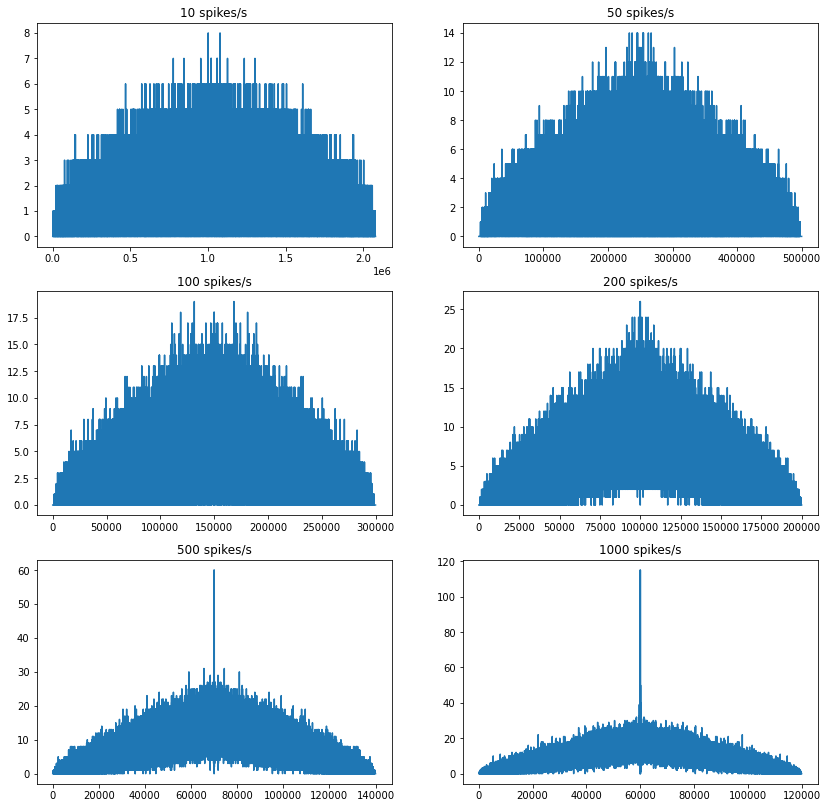

In [20]:
fig = plt.figure(figsize=(14,14))

for i, sp in enumerate(sp_ref.T):
    fig.add_subplot(3,2,i+1)
    spk_t = spike_train(sp,t_stim4[i],t_res)
    corrf = np.correlate(spk_t,spk_t,mode='full')
    corrf[int(len(corrf)/2)]=0
    plt.plot(corrf)
    plt.title(f'{rt_ref[i]} spikes/s')

## Ex. 4 Extra: Gamma Process.

In [28]:
def GammaProcess(k):

    n = 1000*k   # desired number of spikes
    rate = 100*k  # rate in spikes per second
    randNumbers = np.random.rand(n)  # n random numbers, uniform distribution
    ISIs = -np.log(randNumbers)/rate   # ISIs in seconds
    ISIs = ISIs*1000   # ISIs in milliseconds

    # compute spike times from ISIs
    SpikeTimes = np.cumsum(ISIs)/1000
    Sp = SpikeTimes[0:-1:k]
    
    return Sp

### a) Generate Gamma processes.

In [29]:
k= np.array([2,3,5,10])
spikes_gamma = np.empty((k.shape[0],1000))

for i,k_s in enumerate(k):
    spikes_gamma[i,:] = GammaProcess(k_s)

### b and c) Compute ISI histograms and CVs.

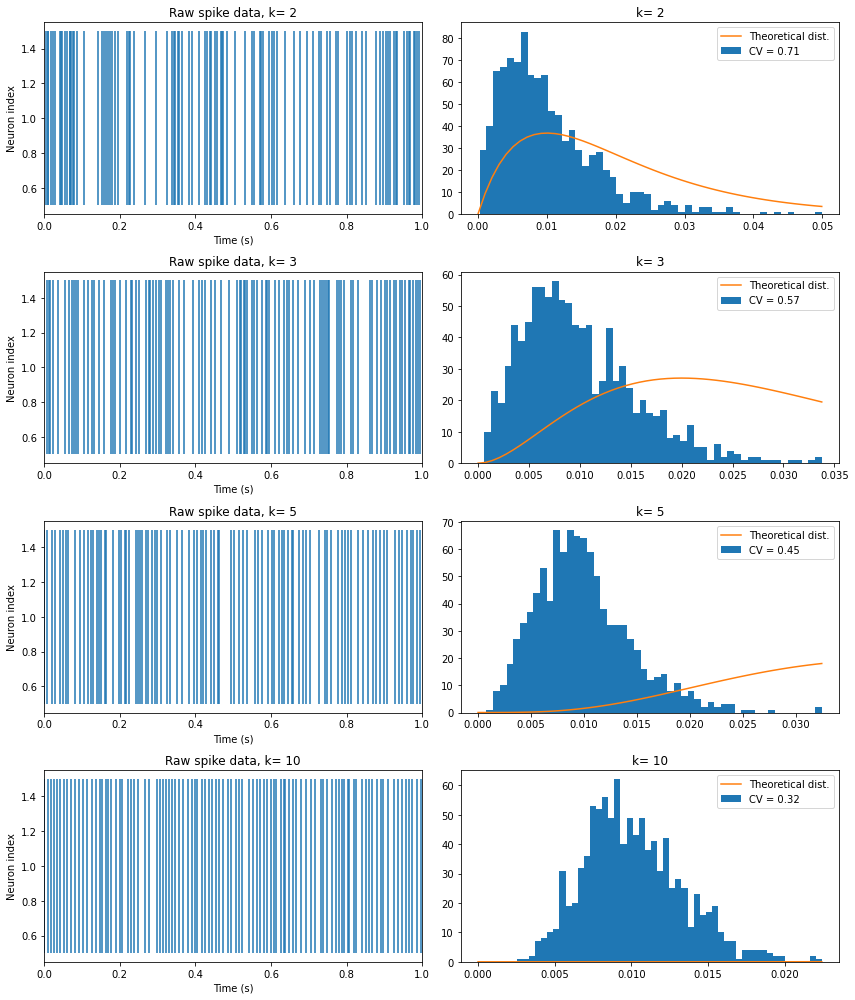

In [30]:
fig=plt.figure(figsize=(12,14))
CVgamma = np.empty(k.shape[0])
t_stim5 = np.empty(k.shape[0])
r= 100

for i, sp in enumerate(spikes_gamma):
    t_stim5[i] = np.round(sp[-1])
    CVgamma[i] = cv(get_ISI(sp))
    
    fig.add_subplot(k.shape[0],2,i*2+1)
    plot_spikes(sp,1,ylim=[0.45,1.55])
    
    plt.title(f'Raw spike data, k= {k[i]}')
    fig.add_subplot(k.shape[0],2,i*2+2)
    
    ISI = get_ISI(sp,hist_not_norm=True,alpha=1,label=f'CV = {CVgamma[i]}')
    tau=np.linspace(0,np.max(ISI),50)
    ro = r*((r*tau)**(k[i]-1))*np.exp(-r*tau)/(np.math.factorial(k[i]-1))
    
    plt.plot(tau,ro,label='Theoretical dist.')
    
    plt.title(f'k= {k[i]}')
    plt.legend();

plt.tight_layout()

I have run into this problem comparing with Theoretical distribution and have tried different scales and so on but could not find the mistake.